# Maximum Likelihood Inference

Import the analytic solution and the SSA such that one can produce artifical data.

In [1]:
include("MF_BDM_Analytic.jl");
using .BDMAnalytic;
using Plots, LaTeXStrings, Distributions, BlackBoxOptim, LinearAlgebra
Plots.theme(:dao)

In [2]:
include("SSABinaryDecision.jl");
using .BinaryDecSSA;

Create some data from the parameter set used for figure 3. Create an ensemble of 1000 simulations starting from the same initial condition at $N/2$.

In [3]:
SSA = BinDecMod(F = 0.025, J = 1.5, N = 50);
Ens = Ensemble(BD = SSA, e_size = 1000, τₘ = 1000, Δτ = 1.0);

Plot a selection of the ensemble. The black trajectory is the one we use for single trajectory parameter inference below.

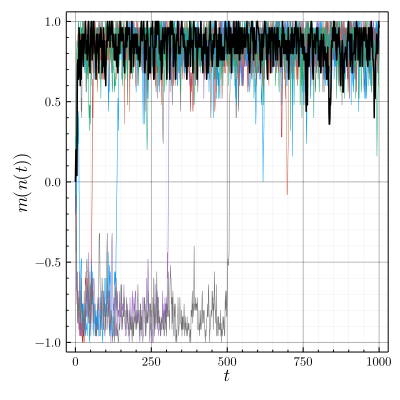

In [4]:
plot(Ens.sims[1],Ens.sims[2][1:10], legend = :none, lw = 0.5)
plot!(Ens.sims[1],Ens.sims[2][1], linecolor = :black, lw = 1.5, legend = :none)
plot!(size=(400,400))
xlabel!(L"t")
ylabel!(L"m(n(t))")

Define the likelihood function for a *single trajectory* such that it can be used by BBO.

In [5]:
times = Ens.sims[1]; # takes times from the data.
data = Ens.sims[2][1]; # choose the black trajectory
function Likelihood(pars) # pars in order [F, log(J), log(γ)]
    F = pars[1]; J, γ = exp.(pars[2:3]); # choose range of log(γ) ∈ [-1,1]
    BDi = BDM(F = F, J = J, γ = γ, N = 50);
    probs_dists = [prob(BDi, t) for t in times];
    mvals = probs_dists[1][1]; # take the values of m
    indices = [findfirst(x->round(x,digits = 5)==data[i],mvals) for i in 1:length(times)];# find indices 
    probs = [probs_dists[i][2][indices[i]] for i in 1:length(times)]; # use indices to find probs
    return convert(Float64,-sum(log.(abs.(probs)))) # return the NLL
end

Likelihood (generic function with 1 method)

In [6]:
Likelihood([0.025,log(1.5),log(1.0)]) # this is the likelihood for the data given the correct parameter set.

2608.850604147688

In [7]:
SRange = [(-2.0,2.0), (-2.0,2.0), (-1.0,1.0)];
res = bboptimize(Likelihood; Method = :adaptive_de_rand_1_bin_radiuslimited, SearchRange = SRange, NumDimensions = 3, PopulationSize = 1000, MaxSteps = 500)
opt_pars = best_candidate(res)
pars = vcat(opt_pars[1],exp.(opt_pars[2:3]))

Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64}, RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
1.90 secs, 2 evals, 1 steps, improv/step: 1.000 (last = 1.0000), fitness=2358.443683802
6.40 secs, 4 evals, 2 steps, improv/step: 0.500 (last = 0.0000), fitness=2358.443683802
8.12 secs, 6 evals, 3 steps, improv/step: 0.667 (last = 1.0000), fitness=2358.443683802
11.11 secs, 8 evals, 4 steps, improv/step: 0.750 (last = 1.0000), fitness=2334.534941399
12.54 secs, 10 evals, 5 steps, improv/step: 0.800 (last = 1.0000), fitness=2334.534941399
19.86 secs, 12 evals, 6 steps, improv/step: 0.667 (last = 0.0000), fitness=2334.534941399
21.42 secs, 14 evals, 7 steps, improv/step: 0.571 (last = 0.0000), fitness=2334.534941399
22.89 secs, 16 evals, 8 steps, improv/step: 0.625 (last = 1.0000), fitness=2334.534941399
24.54 secs, 18 evals, 9 steps, improv/step: 0.556 (last = 0.0000), fitness=2334.534

274.77 secs, 176 evals, 88 steps, improv/step: 0.511 (last = 1.0000), fitness=2271.654979833
275.53 secs, 177 evals, 89 steps, improv/step: 0.506 (last = 0.0000), fitness=2271.654979833
277.31 secs, 179 evals, 90 steps, improv/step: 0.500 (last = 0.0000), fitness=2256.950370460
281.72 secs, 181 evals, 91 steps, improv/step: 0.505 (last = 1.0000), fitness=2256.950370460
283.29 secs, 183 evals, 92 steps, improv/step: 0.500 (last = 0.0000), fitness=2256.950370460
287.81 secs, 185 evals, 93 steps, improv/step: 0.505 (last = 1.0000), fitness=2256.950370460
289.80 secs, 187 evals, 94 steps, improv/step: 0.500 (last = 0.0000), fitness=2256.950370460
291.64 secs, 189 evals, 95 steps, improv/step: 0.505 (last = 1.0000), fitness=2256.950370460
299.96 secs, 191 evals, 96 steps, improv/step: 0.500 (last = 0.0000), fitness=2256.950370460
300.82 secs, 192 evals, 97 steps, improv/step: 0.495 (last = 0.0000), fitness=2256.950370460
302.71 secs, 194 evals, 98 steps, improv/step: 0.500 (last = 1.0000), 

550.37 secs, 345 evals, 175 steps, improv/step: 0.491 (last = 1.0000), fitness=2256.950370460
554.35 secs, 347 evals, 176 steps, improv/step: 0.489 (last = 0.0000), fitness=2256.950370460
555.88 secs, 349 evals, 177 steps, improv/step: 0.492 (last = 1.0000), fitness=2256.950370460
557.33 secs, 351 evals, 178 steps, improv/step: 0.489 (last = 0.0000), fitness=2256.950370460
558.77 secs, 353 evals, 179 steps, improv/step: 0.492 (last = 1.0000), fitness=2256.950370460
560.48 secs, 355 evals, 180 steps, improv/step: 0.489 (last = 0.0000), fitness=2256.950370460
561.95 secs, 357 evals, 181 steps, improv/step: 0.492 (last = 1.0000), fitness=2256.950370460
565.88 secs, 359 evals, 182 steps, improv/step: 0.495 (last = 1.0000), fitness=2256.950370460
569.86 secs, 361 evals, 183 steps, improv/step: 0.497 (last = 1.0000), fitness=2256.950370460
571.34 secs, 363 evals, 184 steps, improv/step: 0.495 (last = 0.0000), fitness=2256.950370460
573.31 secs, 365 evals, 185 steps, improv/step: 0.492 (last 

807.73 secs, 514 evals, 263 steps, improv/step: 0.487 (last = 1.0000), fitness=2256.950370460
809.68 secs, 516 evals, 264 steps, improv/step: 0.485 (last = 0.0000), fitness=2256.950370460
813.94 secs, 518 evals, 265 steps, improv/step: 0.487 (last = 1.0000), fitness=2256.950370460
815.39 secs, 520 evals, 266 steps, improv/step: 0.485 (last = 0.0000), fitness=2256.950370460
816.88 secs, 522 evals, 267 steps, improv/step: 0.487 (last = 1.0000), fitness=2256.950370460
818.49 secs, 524 evals, 268 steps, improv/step: 0.489 (last = 1.0000), fitness=2256.950370460
819.20 secs, 525 evals, 269 steps, improv/step: 0.487 (last = 0.0000), fitness=2256.950370460
820.74 secs, 527 evals, 270 steps, improv/step: 0.485 (last = 0.0000), fitness=2256.950370460
827.23 secs, 529 evals, 271 steps, improv/step: 0.487 (last = 1.0000), fitness=2256.950370460
832.32 secs, 531 evals, 272 steps, improv/step: 0.489 (last = 1.0000), fitness=2256.950370460
833.74 secs, 533 evals, 273 steps, improv/step: 0.491 (last 

1066.40 secs, 668 evals, 350 steps, improv/step: 0.483 (last = 0.0000), fitness=2256.950370460
1067.91 secs, 670 evals, 351 steps, improv/step: 0.484 (last = 1.0000), fitness=2256.950370460
1072.76 secs, 672 evals, 352 steps, improv/step: 0.486 (last = 1.0000), fitness=2256.950370460
1074.30 secs, 674 evals, 353 steps, improv/step: 0.484 (last = 0.0000), fitness=2256.950370460
1076.03 secs, 676 evals, 354 steps, improv/step: 0.483 (last = 0.0000), fitness=2256.950370460
1078.07 secs, 678 evals, 355 steps, improv/step: 0.485 (last = 1.0000), fitness=2256.950370460
1083.94 secs, 680 evals, 356 steps, improv/step: 0.486 (last = 1.0000), fitness=2256.950370460
1084.86 secs, 681 evals, 357 steps, improv/step: 0.487 (last = 1.0000), fitness=2256.950370460
1089.08 secs, 683 evals, 358 steps, improv/step: 0.489 (last = 1.0000), fitness=2256.950370460
1092.45 secs, 685 evals, 359 steps, improv/step: 0.487 (last = 0.0000), fitness=2256.950370460
1098.38 secs, 687 evals, 360 steps, improv/step: 0

1292.26 secs, 828 evals, 437 steps, improv/step: 0.494 (last = 1.0000), fitness=2256.950370460
1293.75 secs, 830 evals, 438 steps, improv/step: 0.495 (last = 1.0000), fitness=2256.950370460
1295.81 secs, 832 evals, 439 steps, improv/step: 0.497 (last = 1.0000), fitness=2256.950370460
1299.90 secs, 834 evals, 440 steps, improv/step: 0.495 (last = 0.0000), fitness=2256.950370460
1303.96 secs, 836 evals, 441 steps, improv/step: 0.497 (last = 1.0000), fitness=2256.950370460
1311.25 secs, 838 evals, 442 steps, improv/step: 0.498 (last = 1.0000), fitness=2256.950370460
1314.80 secs, 840 evals, 443 steps, improv/step: 0.499 (last = 1.0000), fitness=2256.950370460
1322.03 secs, 842 evals, 444 steps, improv/step: 0.498 (last = 0.0000), fitness=2256.950370460
1322.78 secs, 843 evals, 445 steps, improv/step: 0.499 (last = 1.0000), fitness=2256.950370460
1324.39 secs, 845 evals, 446 steps, improv/step: 0.500 (last = 1.0000), fitness=2256.950370460
1326.07 secs, 847 evals, 447 steps, improv/step: 0

3-element Vector{Float64}:
 0.4261955443815868
 0.9847268512949712
 0.3754973635691837

As we see below, calibration done over this whole trajectory exploring a single parameter set does not correspond to a parameter set close to the true one.

In [8]:
pars

3-element Vector{Float64}:
 0.4261955443815868
 0.9847268512949712
 0.3754973635691837

Now consider that we conduct the calibration over 

In [9]:
all_data = [Ens.sims[2][i][1:100] for i in 1:length(Ens.sims[2])];
x_data = Ens.sims[1][1:100];

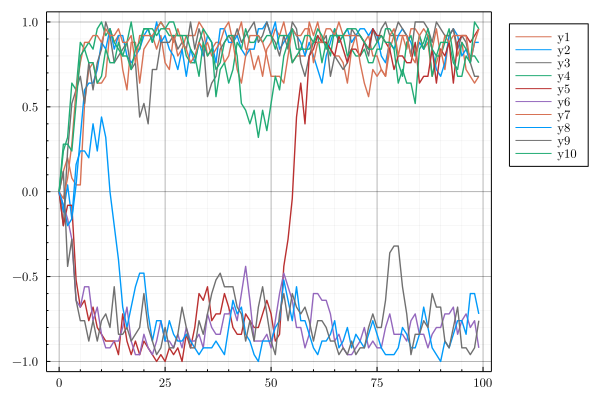

In [10]:
plot(x_data, all_data[1:10])

Now, define the likelihood function one would use for inference over multiple trajectories.

In [11]:
function Likelihood_MT(pars) # pars in order [F, log(J), log(γ)]
    F = pars[1]; J, γ = exp.(pars[2:3]); # choose range of log(γ) ∈ [-1,1]
    BDi = BDM(F = F, J = J, γ = γ, N = 50);
    probs_dists = [prob(BDi, t) for t in x_data];
    all_prob = [];
    mvals = probs_dists[1][1]; # take the values of m
    for i in 1:length(all_data) # loop over each trajectory
        sing_data = all_data[i]
        indices = [findfirst(x->round(x,digits = 5)==sing_data[i],mvals) for i in 1:length(x_data)];# find indices 
        probs = [probs_dists[i][2][indices[i]] for i in 1:length(x_data)]; # use indices to find probs
        all_prob = vcat(probs,all_prob)
    end
    return convert(Float64,-sum(log.(abs.(all_prob)))) # return the NLL
end

Likelihood_MT (generic function with 1 method)

In [12]:
test = Likelihood_MT([0.025,log(1.5),log(1.0)])

301408.36091419426

In [13]:
SRange = [(-2.0,2.0), (-2.0,2.0), (-1.0,1.0)];
res_MT = bboptimize(Likelihood_MT; Method = :adaptive_de_rand_1_bin_radiuslimited, SearchRange = SRange, NumDimensions = 3, PopulationSize = 1000, MaxSteps = 500)
opt_pars_MT = best_candidate(res_MT)
pars_MT = vcat(opt_pars_MT[1],exp.(opt_pars_MT[2:3]))

Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64}, RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
1.39 secs, 2 evals, 1 steps, improv/step: 1.000 (last = 1.0000), fitness=5681096.447858525
2.77 secs, 4 evals, 2 steps, improv/step: 0.500 (last = 0.0000), fitness=1001089.990215959
4.13 secs, 6 evals, 3 steps, improv/step: 0.333 (last = 0.0000), fitness=1001089.990215959
5.51 secs, 8 evals, 4 steps, improv/step: 0.500 (last = 1.0000), fitness=397854.713929707
7.20 secs, 10 evals, 5 steps, improv/step: 0.400 (last = 0.0000), fitness=397854.713929707
8.50 secs, 12 evals, 6 steps, improv/step: 0.500 (last = 1.0000), fitness=397854.713929707
9.84 secs, 14 evals, 7 steps, improv/step: 0.571 (last = 1.0000), fitness=397854.713929707
11.29 secs, 16 evals, 8 steps, improv/step: 0.500 (last = 0.0000), fitness=397854.713929707
12.64 secs, 18 evals, 9 steps, improv/step: 0.444 (last = 0.0000), f

126.66 secs, 172 evals, 87 steps, improv/step: 0.448 (last = 0.0000), fitness=358984.837650318
127.35 secs, 173 evals, 88 steps, improv/step: 0.455 (last = 1.0000), fitness=358984.837650318
128.86 secs, 175 evals, 89 steps, improv/step: 0.449 (last = 0.0000), fitness=358984.837650318
130.67 secs, 177 evals, 90 steps, improv/step: 0.456 (last = 1.0000), fitness=358984.837650318
131.96 secs, 179 evals, 91 steps, improv/step: 0.451 (last = 0.0000), fitness=358984.837650318
133.27 secs, 181 evals, 92 steps, improv/step: 0.457 (last = 1.0000), fitness=358984.837650318
134.63 secs, 183 evals, 93 steps, improv/step: 0.452 (last = 0.0000), fitness=358984.837650318
135.99 secs, 185 evals, 94 steps, improv/step: 0.457 (last = 1.0000), fitness=358984.837650318
137.48 secs, 187 evals, 95 steps, improv/step: 0.453 (last = 0.0000), fitness=358984.837650318
139.28 secs, 189 evals, 96 steps, improv/step: 0.448 (last = 0.0000), fitness=358984.837650318
140.60 secs, 191 evals, 97 steps, improv/step: 0.4

248.91 secs, 338 evals, 173 steps, improv/step: 0.486 (last = 1.0000), fitness=358984.837650318
250.45 secs, 340 evals, 174 steps, improv/step: 0.489 (last = 1.0000), fitness=358984.837650318
252.09 secs, 342 evals, 175 steps, improv/step: 0.491 (last = 1.0000), fitness=358984.837650318
253.47 secs, 344 evals, 176 steps, improv/step: 0.489 (last = 0.0000), fitness=358984.837650318
254.77 secs, 346 evals, 177 steps, improv/step: 0.492 (last = 1.0000), fitness=358984.837650318
256.28 secs, 348 evals, 178 steps, improv/step: 0.494 (last = 1.0000), fitness=358984.837650318
257.74 secs, 350 evals, 179 steps, improv/step: 0.492 (last = 0.0000), fitness=358984.837650318
259.48 secs, 352 evals, 180 steps, improv/step: 0.494 (last = 1.0000), fitness=358984.837650318
260.74 secs, 354 evals, 181 steps, improv/step: 0.492 (last = 0.0000), fitness=358984.837650318
262.16 secs, 356 evals, 182 steps, improv/step: 0.489 (last = 0.0000), fitness=358984.837650318
263.87 secs, 358 evals, 183 steps, impro

372.37 secs, 505 evals, 259 steps, improv/step: 0.502 (last = 0.0000), fitness=358984.837650318
373.76 secs, 507 evals, 260 steps, improv/step: 0.504 (last = 1.0000), fitness=358984.837650318
375.35 secs, 509 evals, 261 steps, improv/step: 0.506 (last = 1.0000), fitness=358984.837650318
376.72 secs, 511 evals, 262 steps, improv/step: 0.508 (last = 1.0000), fitness=358984.837650318
378.08 secs, 513 evals, 263 steps, improv/step: 0.510 (last = 1.0000), fitness=358984.837650318
379.92 secs, 515 evals, 264 steps, improv/step: 0.508 (last = 0.0000), fitness=358984.837650318
381.49 secs, 517 evals, 265 steps, improv/step: 0.506 (last = 0.0000), fitness=358984.837650318
382.80 secs, 519 evals, 266 steps, improv/step: 0.504 (last = 0.0000), fitness=358984.837650318
384.13 secs, 521 evals, 267 steps, improv/step: 0.506 (last = 1.0000), fitness=358984.837650318
385.46 secs, 523 evals, 268 steps, improv/step: 0.507 (last = 1.0000), fitness=358984.837650318
386.77 secs, 525 evals, 269 steps, impro

489.15 secs, 665 evals, 345 steps, improv/step: 0.478 (last = 0.0000), fitness=358984.837650318
490.52 secs, 667 evals, 346 steps, improv/step: 0.477 (last = 0.0000), fitness=358984.837650318
491.19 secs, 668 evals, 347 steps, improv/step: 0.478 (last = 1.0000), fitness=358984.837650318
492.47 secs, 670 evals, 348 steps, improv/step: 0.480 (last = 1.0000), fitness=358984.837650318
493.81 secs, 672 evals, 349 steps, improv/step: 0.479 (last = 0.0000), fitness=358984.837650318
495.10 secs, 674 evals, 350 steps, improv/step: 0.480 (last = 1.0000), fitness=358984.837650318
496.45 secs, 676 evals, 351 steps, improv/step: 0.479 (last = 0.0000), fitness=358984.837650318
498.36 secs, 678 evals, 352 steps, improv/step: 0.480 (last = 1.0000), fitness=358984.837650318
500.00 secs, 680 evals, 353 steps, improv/step: 0.479 (last = 0.0000), fitness=358984.837650318
501.79 secs, 682 evals, 354 steps, improv/step: 0.480 (last = 1.0000), fitness=358984.837650318
503.43 secs, 684 evals, 355 steps, impro

597.49 secs, 817 evals, 431 steps, improv/step: 0.466 (last = 0.0000), fitness=358984.837650318
598.18 secs, 818 evals, 432 steps, improv/step: 0.468 (last = 1.0000), fitness=358984.837650318
598.82 secs, 819 evals, 433 steps, improv/step: 0.469 (last = 1.0000), fitness=358984.837650318
600.14 secs, 821 evals, 434 steps, improv/step: 0.470 (last = 1.0000), fitness=358984.837650318
601.49 secs, 823 evals, 435 steps, improv/step: 0.471 (last = 1.0000), fitness=358984.837650318
602.96 secs, 825 evals, 436 steps, improv/step: 0.470 (last = 0.0000), fitness=358984.837650318
604.51 secs, 827 evals, 437 steps, improv/step: 0.471 (last = 1.0000), fitness=358984.837650318
606.08 secs, 829 evals, 438 steps, improv/step: 0.470 (last = 0.0000), fitness=358984.837650318
607.32 secs, 831 evals, 439 steps, improv/step: 0.469 (last = 0.0000), fitness=358984.837650318
608.91 secs, 833 evals, 440 steps, improv/step: 0.468 (last = 0.0000), fitness=358984.837650318
610.77 secs, 835 evals, 441 steps, impro

3-element Vector{Float64}:
 -0.05919785113145637
  1.6157138290882027
  1.9444124925126465

As we can see, even though the $\gamma$ parameter has been misinferred, the values $F$ and $J$ are close to being identified compared to the case of calibration on a single trajectory.

In [14]:
pars_MT

3-element Vector{Float64}:
 -0.05919785113145637
  1.6157138290882027
  1.9444124925126465